# NBA Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datasets

In [2]:
NBA_df = pd.read_csv('Preprocessed_NBA.csv')
NBA_df

,Playoff.Wins,FGA,FG_perc,X3PA,X3P_perc,FTA,FT_perc,ORB,DRB,TRB,...,X3PAr,eFG_perc,TOV_perc,ORB_perc,FT.FGA,eFG_perc_1,TOV_perc_2,DRB_perc,FT.FGA_3,Attendance
0,16,27,4,11,11,6,26,21,6,11,...,7,4,24,13,6,2,12,17,3,11
1,14,18,14,22,22,5,15,14,12,10,...,22,21,16,14,7,4,3,6,14,23
2,10,2,7,2,3,26,1,24,9,17,...,2,3,1,27,20,15,9,19,10,3
3,8,28,24,6,8,12,9,26,18,25,...,3,14,9,24,9,5,15,1,15,1
4,7,1,3,9,4,24,18,25,1,3,...,12,2,6,26,29,1,18,21,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,26,21,27,3,23,14,16,7,9,...,24,23,10,16,15,2,21,8,16,15
300,1,2,18,23,20,17,18,2,9,4,...,27,22,6,6,25,12,7,10,17,11
301,1,11,19,10,10,25,16,4,22,15,...,11,12,18,5,22,16,12,13,27,18
302,1,5,10,29,23,1,19,15,6,8,...,29,20,16,21,3,15,15,18,28,21


In [3]:
test_df = pd.read_csv('test.csv', index_col=0)
test_df

,Playoff.Wins,FGA,FG_perc,X3PA,X3P_perc,FTA,FT_perc,ORB,DRB,TRB,...,X3PAr,eFG_perc,TOV_perc,ORB_perc,FT.FGA,eFG_perc_1,TOV_perc_2,DRB_perc,FT.FGA_3,Attendance
Team,,,,,,,,,,,,,,,,,,,,,
Golden State Warriors,16,21,10,3,8,26,17,20,2,7,...,2,3,29,18,22,2,7,2,22,9
Boston Celtics,14,18,15,9,14,24,2,11,4,5,...,8,9,13,8,15,1,11,11,9,10
Miami Heat,11,28,13,14,1,19,5,18,18,22,...,10,5,28,12,6,12,3,9,27,4
Dallas Mavericks,9,27,18,8,19,22,16,24,20,24,...,5,13,8,24,18,6,15,8,10,3
Milwaukee Bucks,7,8,12,5,5,10,15,15,1,2,...,6,6,10,15,10,19,27,3,2,11
Phoenix Suns,7,6,1,26,9,27,7,19,5,10,...,27,4,5,19,26,3,9,13,16,19
Memphis Grizzlies,6,1,19,23,17,7,28,1,8,1,...,28,23,4,1,23,10,4,10,15,21
Philadelphia 76ers,6,30,16,27,7,3,1,30,19,29,...,22,16,7,29,1,11,16,17,13,2
New Orleans Pelicans,2,16,23,24,27,6,10,3,24,11,...,24,24,17,3,3,26,8,7,18,24


## Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Training/testing sets

In [5]:
train_features = NBA_df.loc[:,~NBA_df.columns.isin(['Playoff.Wins'])]
train_labels = NBA_df.loc[:,['Playoff.Wins']]
test_features =  test_df.loc[:,~NBA_df.columns.isin(['Playoff.Wins'])]
test_labels = test_df.loc[:,['Playoff.Wins']]

In [6]:
print('Size of train features:', train_features.shape[0])
print('Size of test features:', test_features.shape[0])

Size of train features: 304
Size of test features: 16


### Basic Random Forest

In [7]:
NBA_rf = RandomForestRegressor(random_state=10).fit(train_features, train_labels)

<ipython-input-7-48fed504d906>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  NBA_rf = RandomForestRegressor(random_state=10).fit(train_features, train_labels)


In [8]:
NBA_train_prediction = NBA_rf.predict(train_features)
NBA_test_prediction = NBA_rf.predict(test_features)

NBA_train_rmse = np.sqrt(mean_squared_error(train_labels, NBA_train_prediction))
NBA_train_r2 = r2_score(train_labels, NBA_train_prediction)

NBA_test_rmse = np.sqrt(mean_squared_error(test_labels, NBA_test_prediction))
NBA_test_r2 = r2_score(test_labels, NBA_test_prediction)

print('NBA Train RMSE:', NBA_train_rmse)
print('NBA Train R2:', NBA_train_r2)

print('NBA Test RMSE:', NBA_test_rmse)

NBA Train RMSE: 1.3364369853417981
NBA Train R2: 0.919880829747907
NBA Test RMSE: 2.6698841266991344


In [9]:
NBA_test_prediction

array([11.62,  8.89, 10.55,  7.03,  6.46,  9.41,  8.83,  6.21,  1.74,
        1.94,  8.3 ,  2.43,  3.12,  1.89,  2.68,  1.57])

### Tuning Parameters

In [10]:
# Number of trees in random forest
n_estimators = list(range(10,200,10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(10,100,10))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(5,100,5))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,55,5))
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [11]:
# Create the random grid
from pprint import pprint
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51],
 'min_samples_split': [5,
                       10,
                       15,
                       20,
                       25,
                       30,
                       35,
                       40,
                       45,
                       50,
                       55,
                       60,
                       65,
                       70,
                       75,
                       80,
                       85,
                       90,
                       95],
 'n_estimators': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
          

In [12]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 500 different combinations, and use all available cores
NBA_RF1 = RandomizedSearchCV(estimator = NBA_rf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=10, n_jobs = -1)
# Fit the random search model
NBA_RF1.fit(train_features, train_labels)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\Karen\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 6, 11, 16, 21,
                                                             26, 31, 36, 41, 46,
                                                             51],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                 

In [13]:
NBA_RF1.best_params_,NBA_RF1.best_score_

({'n_estimators': 170,
  'min_samples_split': 5,
  'min_samples_leaf': 21,
  'max_features': 'auto',
  'max_depth': 70,
  'bootstrap': True},
 0.4425283378748775)

In [14]:
NBA_final = RandomForestRegressor(random_state=10, n_estimators = 170,
                                             min_samples_split = 5,
                                             min_samples_leaf = 21,
                                             max_features = 'auto',
                                             max_depth = 70,
                                             bootstrap = True).fit(train_features, train_labels)

<ipython-input-14-26a0b7e3f0f4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  NBA_final = RandomForestRegressor(random_state=10, n_estimators = 170,


In [ ]:
NBA_train_prediction = NBA_rf.predict(train_features)

NBA_train_rmse = np.sqrt(mean_squared_error(train_labels, NBA_train_prediction))
NBA_train_r2 = r2_score(train_labels, NBA_train_prediction)

NBA_test_rmse = np.sqrt(mean_squared_error(test_labels, NBA_test_prediction))
NBA_test_r2 = r2_score(test_labels, NBA_test_prediction)

print('NBA Train RMSE:', NBA_train_rmse)
print('NBA Train R2:', NBA_train_r2)

In [15]:
NBA_final_test_prediction = NBA_final.predict(test_features)
NBA_final_test_rmse = np.sqrt(mean_squared_error(test_labels, NBA_final_test_prediction))
print('NBA_final Test RMSE:', NBA_final_test_rmse)

NBA_final Test RMSE: 2.622328844570152


In [16]:
NBA_final_test_prediction

array([10.7548893 ,  7.56406983,  9.8493751 ,  7.28465416,  6.33289315,
        9.6026202 ,  8.26350104,  5.63678004,  1.7066414 ,  2.02739906,
        5.71484496,  2.51906369,  3.06424422,  1.86129806,  2.26407335,
        1.89627144])

In [17]:
Table = pd.DataFrame({'Team':test_df.index, 'Wins':NBA_final_test_prediction})
Table.sort_values(by=['Wins'], ascending=False)

,Team,Wins
0,Golden State Warriors,10.754889
2,Miami Heat,9.849375
5,Phoenix Suns,9.602620
6,Memphis Grizzlies,8.263501
1,Boston Celtics,7.564070
3,Dallas Mavericks,7.284654
4,Milwaukee Bucks,6.332893
10,Utah Jazz,5.714845
7,Philadelphia 76ers,5.636780
12,Denver Nuggets,3.064244


     Feature                     Importance
1) W                              0.692228
2) MOV                            0.115920
3) SOS                            0.044024
4) TOV_perc                       0.024468
5) eFG_perc                       0.021066
6) Attendance                     0.013817
7) O_STL                          0.010298
8) FG_perc                        0.005980
9) O_FG_perc                      0.005828
10) TOV                            0.005795
11) O_3P_perc                      0.005525
12) FT.FGA                         0.004157
13) FGA                            0.003793
14) O_PF                           0.003517
15) AST                            0.002941


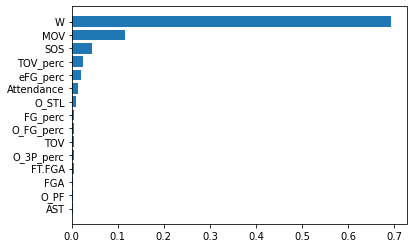

In [18]:
importance = NBA_final.feature_importances_
indices = np.argsort(importance)[::-1]
plot_axis = indices[:15][::-1]
plt.barh(train_features.columns[plot_axis], importance[plot_axis])

print('     Feature        ', '            Importance')

for f in range(15):
    print("%d) %-*s %f" % (f+1, 30, train_features.columns[indices[f]], importance[indices[f]]))